In [1]:
# --- PASO 1: Importar todas las bibliotecas necesarias ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:

# --- PASO 2: Cargar y explorar el conjunto de datos Iris ---
print("Cargando el dataset Iris...")
iris_dataset = load_iris()

print("\nLlaves del dataset Iris:")
print(iris_dataset.keys())

print("\nPrimeras líneas de la descripción del dataset:")
print(iris_dataset['DESCR'][:193] + "\n...")

Cargando el dataset Iris...

Llaves del dataset Iris:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Primeras líneas de la descripción del dataset:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


In [3]:
# --- PASO 3: Dividir los datos en conjuntos de entrenamiento y prueba ---
# Se utiliza random_state=0 para asegurar que la división sea siempre la misma,
# lo que permite reproducir los resultados exactos de la guía.
print("\nDividiendo los datos en entrenamiento (75%) y prueba (25%)...")
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Dividiendo los datos en entrenamiento (75%) y prueba (25%)...
Forma de X_train: (112, 4)
Forma de y_train: (112,)
Forma de X_test: (38, 4)
Forma de y_test: (38,)



Creando gráfico de pares para visualización...


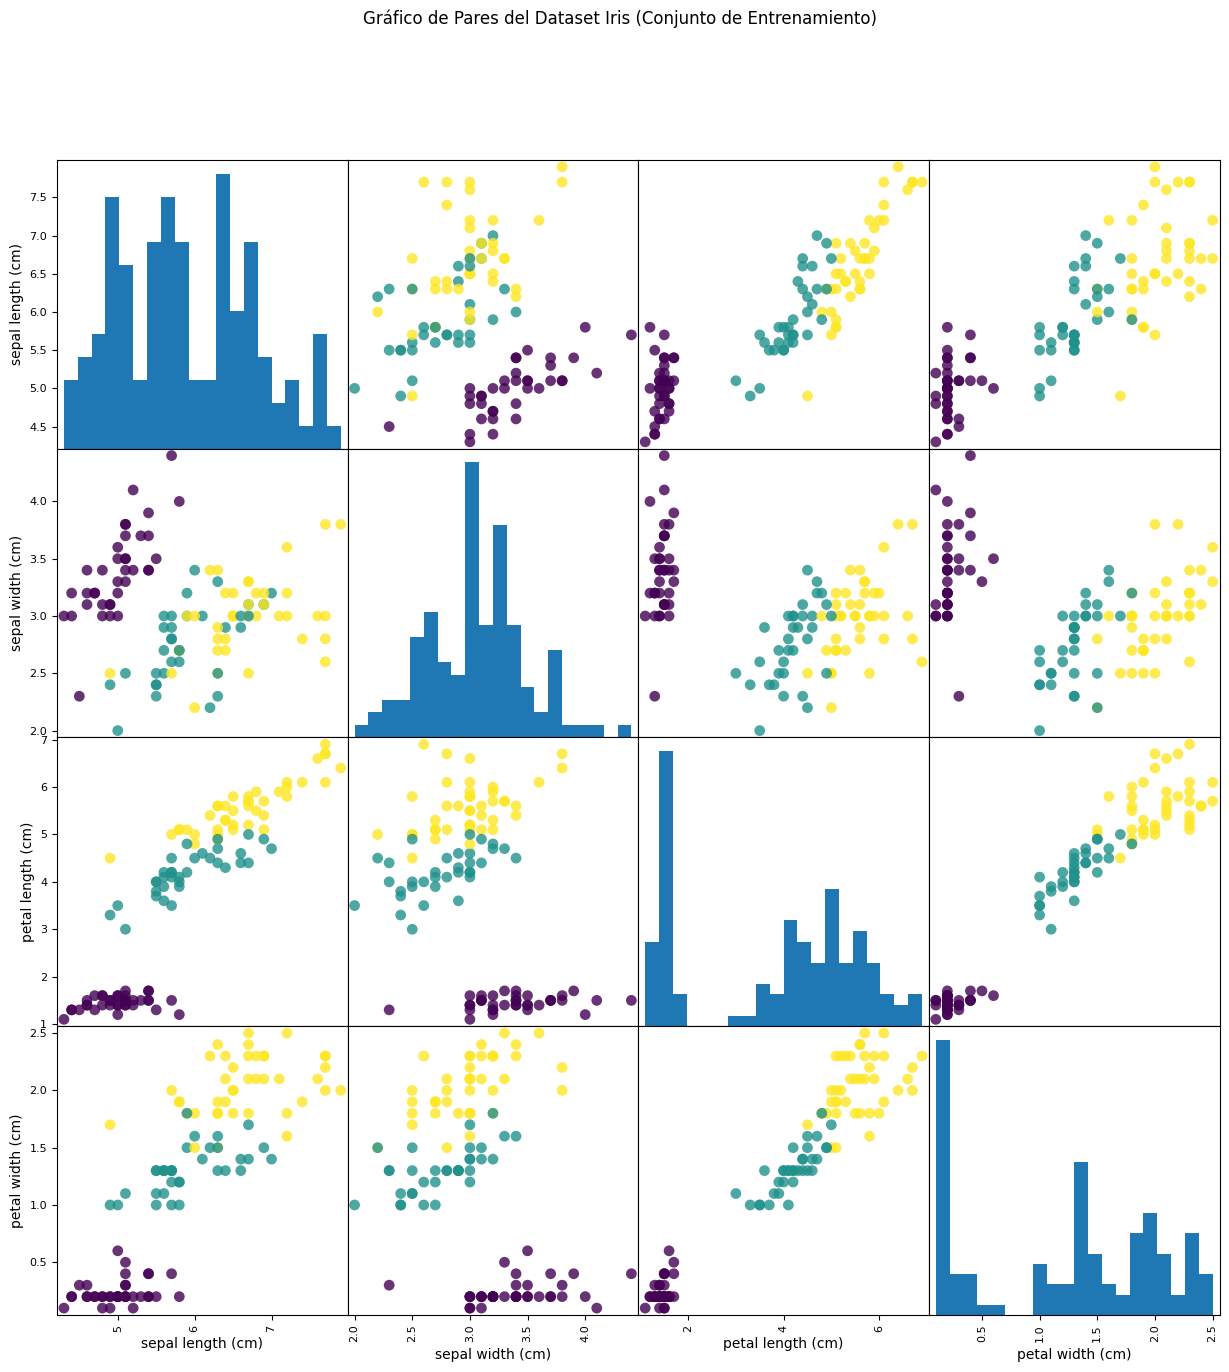

In [4]:
# --- PASO 4: Visualizar los datos (Gráfico de pares) ---
print("\nCreando gráfico de pares para visualización...")
# Crear un DataFrame de pandas a partir de los datos de entrenamiento
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# Crear la matriz de dispersión, coloreando por la clase (y_train)
# Nota: La guía usa mglearn.cm3, aquí usamos un mapa de color estándar de matplotlib ('viridis')
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap='viridis')

plt.suptitle("Gráfico de Pares del Dataset Iris (Conjunto de Entrenamiento)")
plt.show()

In [5]:

# --- PASO 5: Construir el modelo K-Vecinos más Cercanos (KNN) ---
print("\nConstruyendo y entrenando el modelo KNN...")
# Instanciar el clasificador. Usamos k=1 como en la guía.
knn = KNeighborsClassifier(n_neighbors=1)

# Entrenar el modelo usando el conjunto de entrenamiento
knn.fit(X_train, y_train)
print("Modelo entrenado con éxito.")


Construyendo y entrenando el modelo KNN...
Modelo entrenado con éxito.


In [6]:
# --- PASO 6: Realizar una predicción con datos nuevos ---
print("\nRealizando una predicción para una nueva flor...")
# Datos de una nueva flor hipotética: sépalo 5cm x 2.9cm, pétalo 1cm x 0.2cm
X_new = np.array([[5, 2.9, 1, 0.2]])
print("Datos de la nueva flor:", X_new)

prediction = knn.predict(X_new)
print("Predicción (código):", prediction)
print("Nombre de la especie predicha:", iris_dataset['target_names'][prediction])


Realizando una predicción para una nueva flor...
Datos de la nueva flor: [[5.  2.9 1.  0.2]]
Predicción (código): [0]
Nombre de la especie predicha: ['setosa']


In [7]:
# --- PASO 7: Evaluar el modelo con el conjunto de prueba ---
print("\nEvaluando la precisión del modelo con el conjunto de prueba...")
# Usar el método score, que calcula la precisión automáticamente
accuracy = knn.score(X_test, y_test)

print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.2f}")

# El resultado de 0.97 significa que el modelo clasificó correctamente el 97%
# de las flores en el conjunto de datos de prueba.


Evaluando la precisión del modelo con el conjunto de prueba...
Precisión del modelo en el conjunto de prueba: 0.97
